In [1]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image
import arff



In [2]:
_METRICS_FILE = './files/benchmark_v1.1'
_METRIC = 'accuracy'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv'

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")
    
metrics['total_time_s'] = metrics.apply(lambda row: row['train_time_s']+row['test_time_s'], axis=1)

metrics = metrics[metrics['classifier'] == _CLASSIFIER]
metrics = metrics.set_index('dataset')
metrics = metrics.sort_values(by=_METRIC)

#metrics = metrics.head(20)
metrics

,classifier,total,tp,tn,fp,fn,precision,recall,f1,fbeta,accuracy,train_time_s,test_time_s,total_time_s
dataset,,,,,,,,,,,,,,
Adiac,keras_parallel_3_Dilated_Conv,771.0,0.000000,0.026316,0.000000,0.000000,0.022259,0.050292,0.026268,0.026268,0.050292,0.000000,0.356161,0.356161
ShapesAll,keras_parallel_3_Dilated_Conv,1190.0,0.000000,0.262500,0.012500,0.000000,0.070052,0.088750,0.074950,0.074950,0.088750,0.000000,1.079924,1.079924
Phoneme,keras_parallel_3_Dilated_Conv,2100.0,0.000000,0.929825,0.000000,0.005848,0.045696,0.128200,0.057919,0.057919,0.128200,2.034932,3.473244,5.508177
InlineSkate,keras_parallel_3_Dilated_Conv,640.0,0.000000,0.000000,0.000000,0.000000,0.036044,0.153333,0.057389,0.057389,0.153333,0.000000,0.710611,0.710611
Haptics,keras_parallel_3_Dilated_Conv,453.0,0.000000,0.000000,0.000000,0.000000,0.044698,0.184921,0.069156,0.069156,0.184921,0.000000,0.104329,0.104329
NonInvasiveFetalECGThorax1,keras_parallel_3_Dilated_Conv,3755.0,0.000000,0.240356,0.000000,0.002967,0.198118,0.215875,0.197191,0.197191,0.215875,0.000000,5.629453,5.629453
Mallat,keras_parallel_3_Dilated_Conv,2390.0,0.000000,0.500000,0.005000,0.000000,0.145563,0.220000,0.151677,0.151677,0.220000,2.040247,4.054133,6.094380
OSULeaf,keras_parallel_3_Dilated_Conv,432.0,0.000000,0.200000,0.200000,0.200000,0.258333,0.220000,0.203238,0.203238,0.220000,0.000000,0.043776,0.043776
UWaveGestureLibraryX,keras_parallel_3_Dilated_Conv,4458.0,0.000000,1.268473,0.000000,0.000000,0.100577,0.249384,0.137299,0.137299,0.249384,0.000000,4.037236,4.037236


In [4]:
dir_path = '../../datasets_arff'
#dir_name = os.path.dirname(__file__)
arff_files = glob.glob(os.path.join(dir_path, '**/*.arff'), recursive=True)
for file_path in arff_files:
    dataset_name = os.path.basename(file_path).replace('.arff', '')
    try:
        data = arff.load(file_path)
        for e in data:
            element = e
            break
        #print(element)
        metrics[dataset_name]['num_attributes'] = len(element)
    except Exception:
        #print("key error: "+ dataset_name)
        pass

<Figure size 432x288 with 0 Axes>

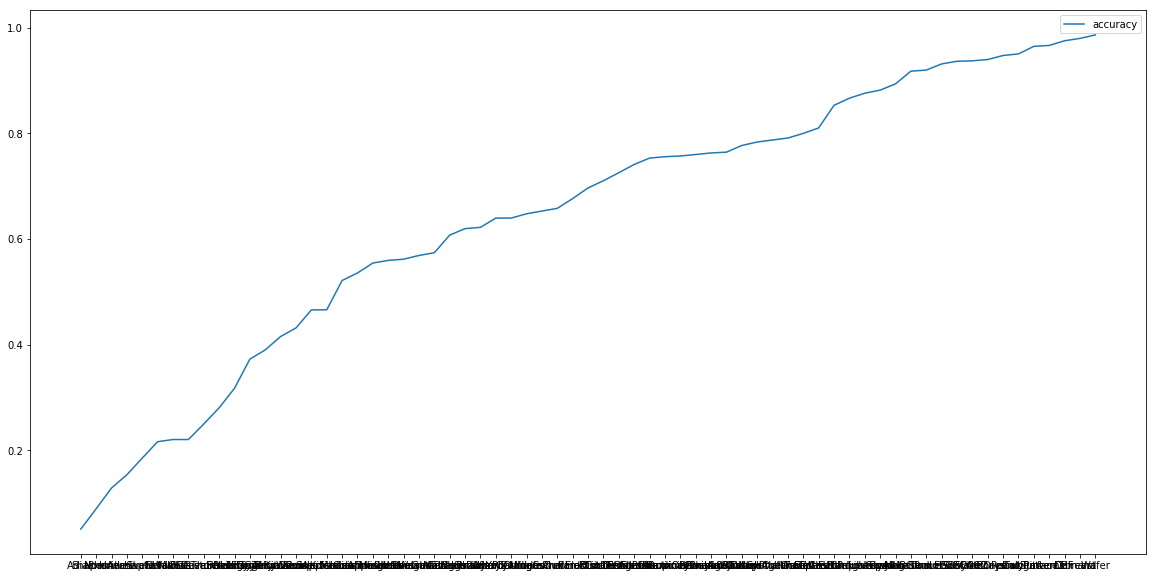

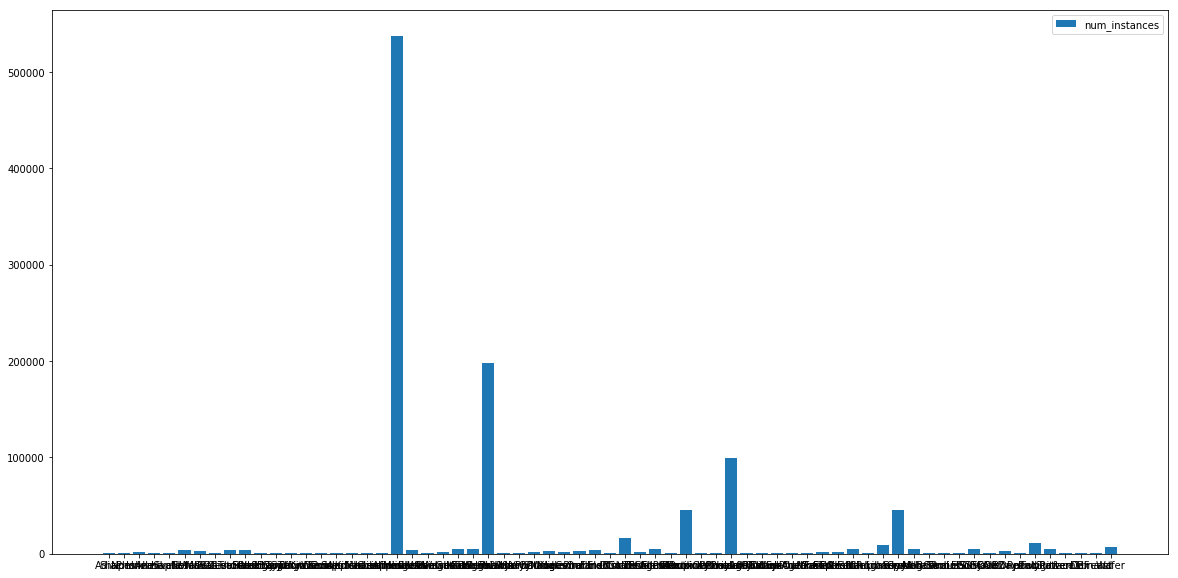

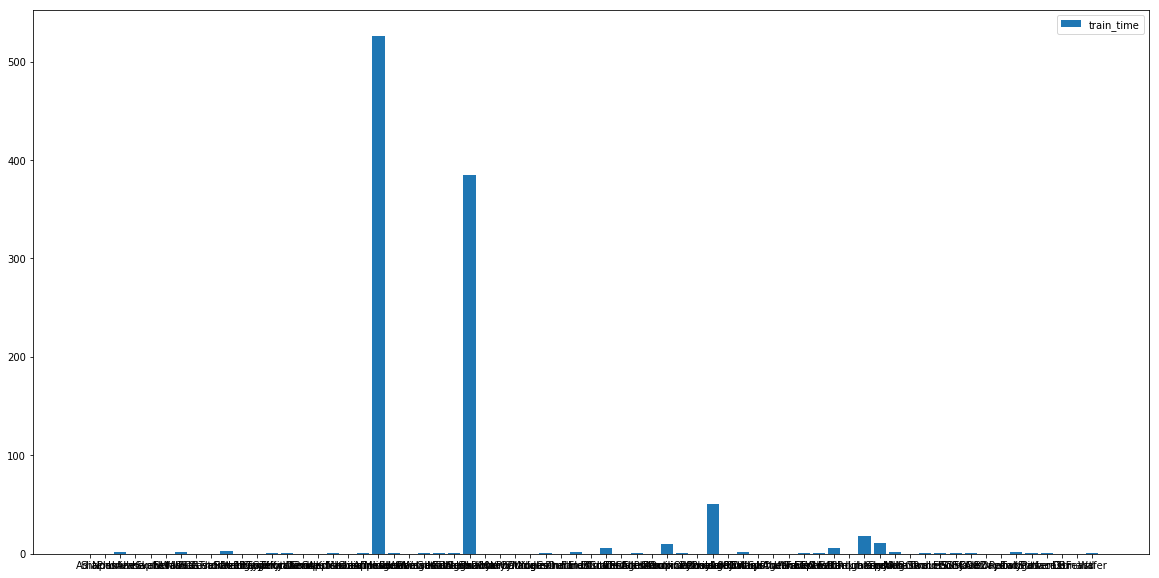

In [5]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.plot(metrics[_METRIC], label=_METRIC)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(metrics.index,metrics['total'], label='num_instances')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(metrics.index,metrics['train_time_s'], label='train_time')
plt.legend(loc='best')
plt.show()







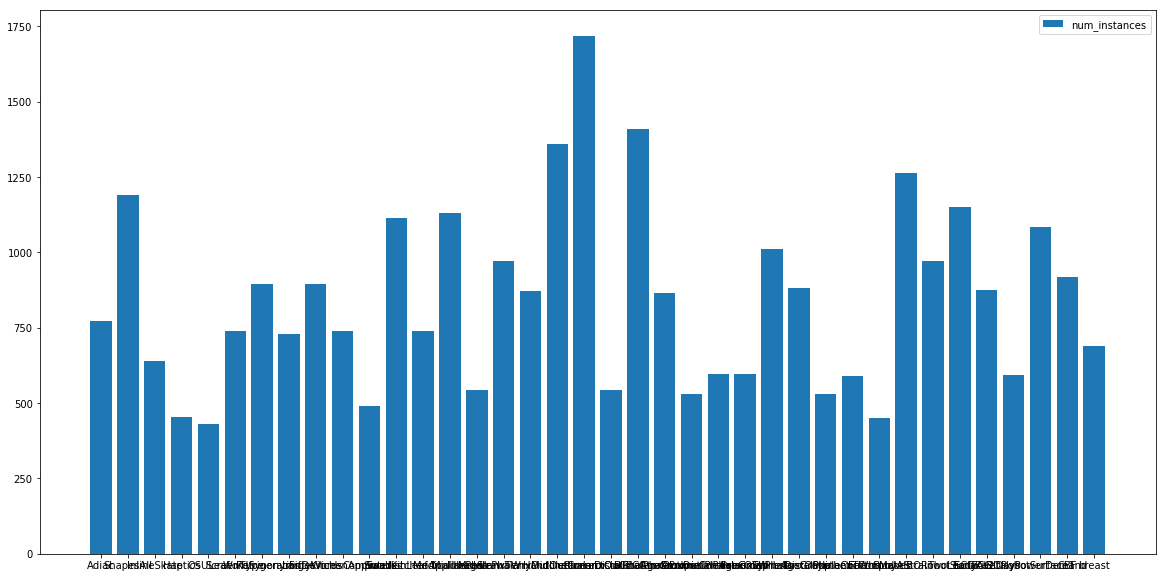

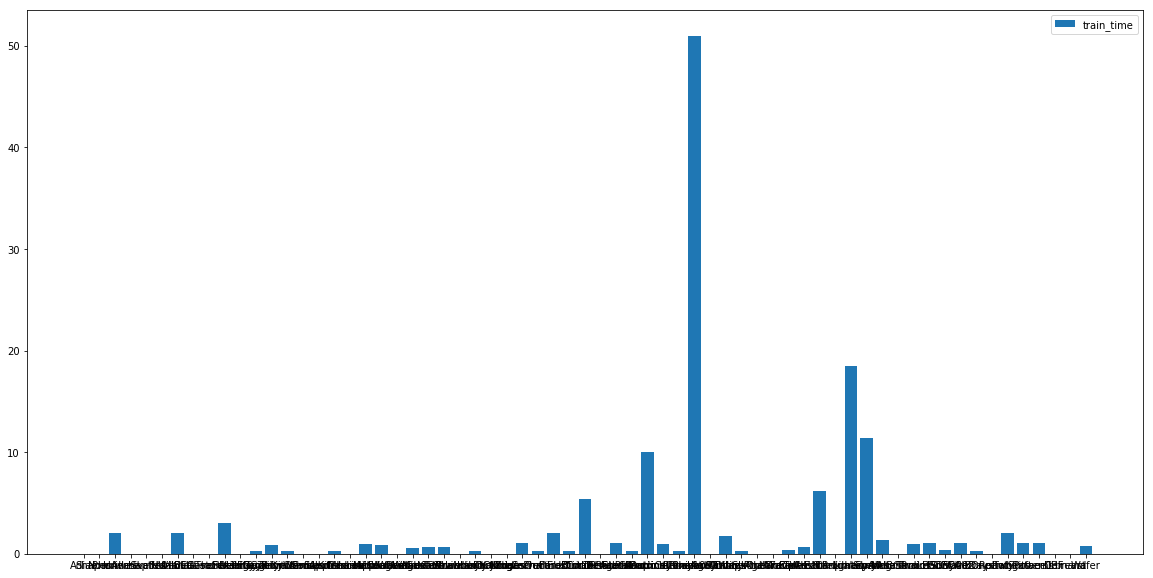

In [6]:
metrics_total_no_big = metrics[metrics['total']<2000]
plt.figure(figsize=(20,10))
plt.bar(metrics_total_no_big.index,metrics_total_no_big['total'], label='num_instances')
plt.legend(loc='best')
plt.show()

metrics_train_no_big = metrics[metrics['train_time_s']<300]
plt.figure(figsize=(20,10))
plt.bar(metrics_train_no_big.index,metrics_train_no_big['train_time_s'], label='train_time')
plt.legend(loc='best')
plt.show()